# Making a Manim Animation of N-body orbits

In [6]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from manim import *
import pandas as pd

In [13]:
# load data output by orbit_run.py
bumblebee = pd.read_csv("ThreeBodyBumblebee_output.dat", delimiter=';')
butterflyI = pd.read_csv("ThreeBodyButterflyI_output.dat", delimiter=';')
butterflyII = pd.read_csv("ThreeBodyButterflyII_output.dat", delimiter=';')
test_conditions = pd.read_csv("test_conditions_output.dat", delimiter=';')

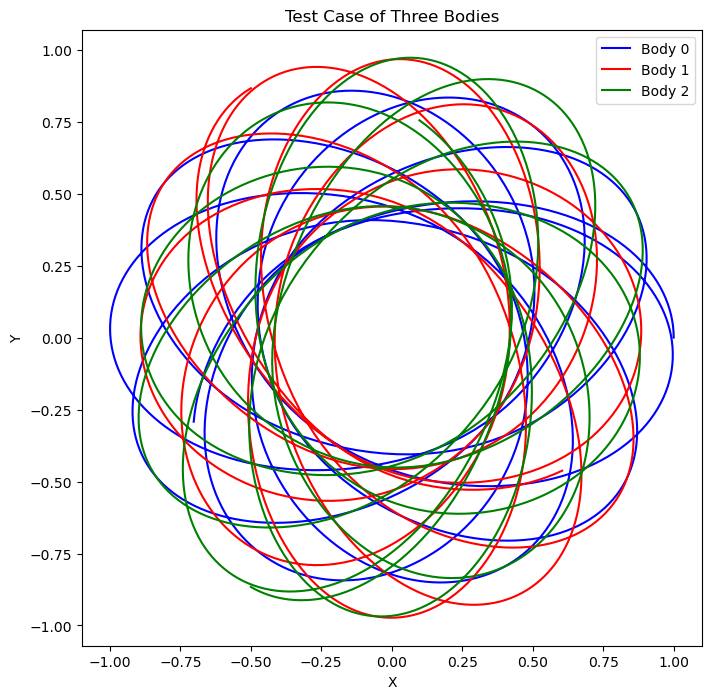

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(test_conditions['body_0_r']*np.cos(test_conditions['body_0_phi']), test_conditions['body_0_r']*np.sin(test_conditions['body_0_phi']), color="blue", label = "Body 0")
ax.plot(test_conditions['body_1_r']*np.cos(test_conditions['body_1_phi']), test_conditions['body_1_r']*np.sin(test_conditions['body_1_phi']), color="red", label = "Body 1")
ax.plot(test_conditions['body_2_r']*np.cos(test_conditions['body_2_phi']), test_conditions['body_2_r']*np.sin(test_conditions['body_2_phi']), color="green" , label = "Body 2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Test Case of Three Bodies')
ax.legend()
plt.show()


In [ ]:
# -------------------------------
# Manim Scene
# -------------------------------
class NBodiesScene(Scene):
    def construct(self):
        t_tracker = ValueTracker(0.0)

        t_grid = solution.t
        x1_grid = solution.x[0,:]
        x2_grid = solution.x[1,:]

        def x1_of(t):
            return np.interp(t, t_grid, x1_grid)

        def x2_of(t):
            return np.interp(t, t_grid, x2_grid)

        # ---- Scene layout ----
        # Shift the spring-mass system down to make room for the titles
        system_shift = UP * 0.5
        
        # Horizontal rail (just a guide)
        rail = Line(LEFT*6, RIGHT*6, stroke_opacity=0.25).shift(system_shift)

        # "Walls"
        left_wall  = Rectangle(width=0.25, height=3.5).move_to(LEFT*6 + system_shift)
        right_wall = Rectangle(width=0.25, height=3.5).move_to(RIGHT*6 + system_shift)
        left_wall.set_fill(GREY, opacity=1.0).set_stroke(width=0)
        right_wall.set_fill(GREY, opacity=1.0).set_stroke(width=0)

        # Mass blocks (centered vertically, move along x only)
        mass_w, mass_h = 1.0, 0.6
        mass1 = Rectangle(width=mass_w, height=mass_h, color=BLUE, fill_opacity=1.0)
        mass2 = Rectangle(width=mass_w, height=mass_h, color=GREEN, fill_opacity=1.0)
        
        # Equilibrium positions for the two masses in scene coords
        # (These are *centers* where x1=x2=0.)
        x1_eq = -3.0
        x2_eq = +3.0

        # Scale factor to map physical displacement (in "meters") to scene units
        scale = 2.0  # feel free to adjust
        
        # Initialize positions at t=0
        mass1.move_to([x1_eq + scale*x1_of(0.0), 0.0, 0.0] + system_shift)
        mass2.move_to([x2_eq + scale*x2_of(0.0), 0.0, 0.0] + system_shift)

        # Add static elements
        self.add(rail, left_wall, right_wall, mass1, mass2), #label1, label2)

        # Updaters for the masses (position vs. t)
        def mass1_updater(mob):
            t = t_tracker.get_value()
            x = x1_eq + scale*x1_of(t)
            mob.move_to([x, 0.0, 0.0] + system_shift)

        def mass2_updater(mob):
            t = t_tracker.get_value()
            x = x2_eq + scale*x2_of(t)
            mob.move_to([x, 0.0, 0.0] + system_shift)

        mass1.add_updater(mass1_updater)
        mass2.add_updater(mass2_updater)

        spring_left = always_redraw(
            lambda: spring_polyline(
                left_wall.get_right(), mass1.get_left(), coils=6, amplitude=0.25, inset=0.25
            ).set_color(WHITE)
        )
        spring_middle = always_redraw(
            lambda: spring_polyline(
                mass1.get_right(), mass2.get_left(), coils=12, amplitude=0.25, inset=0.25
            ).set_color(WHITE)
        )
        spring_right = always_redraw(
            lambda: spring_polyline(
                mass2.get_right(), right_wall.get_left(), coils=6, amplitude=0.25, inset=0.25
            ).set_color(WHITE)
        )

        self.add(spring_left, spring_middle, spring_right)
        
        time_readout = DecimalNumber(number=0.0, num_decimal_places=2, include_sign=False).set_font_size(28).to_corner(UR).shift(LEFT*1.1 + DOWN*1.5)
        def time_updater(mob):
            mob.set_value(t_tracker.get_value())
            
        time_readout.add_updater(time_updater)
        
        time_label = Text("t (s) =", font_size=28).next_to(time_readout, LEFT, buff=0.2)
        self.add(time_label, time_readout)
        self.play(t_tracker.animate.set_value(T_total), run_time=T_total, rate_func=linear)

In [ ]:
%%manim SpringMasseScene
T_total = 5.0